# Table of Contents
 <p><div class="lev1"><a href="#Single-loop"><span class="toc-item-num">1&nbsp;&nbsp;</span>Single loop</a></div><div class="lev1"><a href="#Many-LEFs"><span class="toc-item-num">2&nbsp;&nbsp;</span>Many LEFs</a></div><div class="lev1"><a href="#Statistics-of-loop-arrays."><span class="toc-item-num">3&nbsp;&nbsp;</span>Statistics of loop arrays.</a></div><div class="lev1"><a href="#Visualize-loops"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize loops</a></div>

In [1]:
import sys

import numpy as np

import pyximport; pyximport.install(
    setup_args={"include_dirs":np.get_include()},
    reload_support=True)
from looplib import loopviz, looptools, simlef_onesided, simlef
import os, sys, glob, shelve, time


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload
reload(loopviz)

import seaborn as sns
sns.set_style('white')

# Single loop

In [3]:
p = {}
p['L'] = 100
p['N'] = 1
p['R_OFF'] = 1.0 / 100
p['R_EXTEND'] = float(1.0)
p['R_SHRINK'] = 0#float(.4)
p['R_SWITCH'] =  0.03

p['T_MAX_LIFETIMES'] = 3.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 300
p['PROCESS_NAME'] = b'proc'

l_sites, r_sites, leading_legs, ts = simlef_onesided.simulate(p)
#l_sites, r_sites, ts = simlef.simulate(p)


b'proc' 10 14.42531723487518 300.0
b'proc' 20 29.17314452271834 300.0
b'proc' 30 42.35714889983879 300.0
b'proc' 40 58.698682882642885 300.0
b'proc' 50 83.69413743473946 300.0
b'proc' 60 98.5425529576151 300.0
b'proc' 70 110.9386937914856 300.0
b'proc' 80 125.38561281927699 300.0
b'proc' 90 142.39904709021866 300.0
b'proc' 100 160.15653925400454 300.0
b'proc' 110 174.81909704289907 300.0
b'proc' 120 187.57329988734992 300.0
b'proc' 130 204.1817992906797 300.0
b'proc' 140 220.48335416667496 300.0
b'proc' 150 241.45508377532553 300.0
b'proc' 160 257.5729812563208 300.0
b'proc' 170 280.5868988495545 300.0
b'proc' 180 300.13706833845833 300.0
b'proc' 190 316.43943597346436 300.0
b'proc' 200 335.44325649027036 300.0
b'proc' 210 357.6266668753823 300.0
b'proc' 220 377.33141785532865 300.0
b'proc' 230 393.7953217776738 300.0
b'proc' 240 413.2838234704751 300.0
b'proc' 250 504.64991628473337 300.0
b'proc' 260 519.5394595126398 300.0
b'proc' 270 536.3830424677202 300.0
b'proc' 280 559.839481723

(0.0, 100.0)

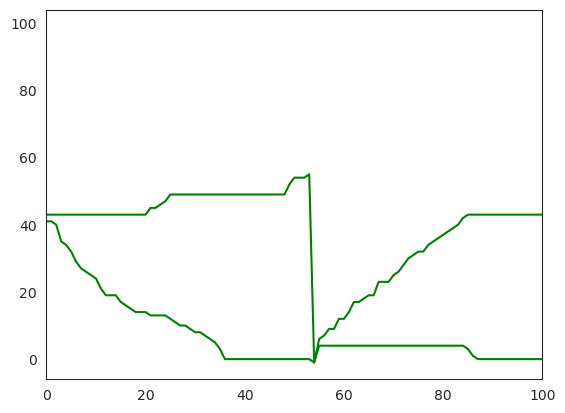

In [4]:
n=0
plt.plot(
    l_sites[:,n], c='g')
plt.plot(
    r_sites[:,n], c='g')

plt.xlim(0,100)

# Many LEFs

In [5]:
p = {}
p['L'] = 20000
p['N'] = 300
p['R_OFF'] = 1.0 / 1000.0
p['R_EXTEND'] = float(2.0)
p['R_SHRINK'] = float(0.1)

p['R_SWITCH'] = p['R_OFF'] * 10

p['T_MAX_LIFETIMES'] = 100.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 200
p['PROCESS_NAME'] = b'proc'

l_sites, r_sites, leading_legs, ts = simlef_onesided.simulate(p)
#l_sites, r_sites, ts = simlef.simulate(p)


b'proc' 10 5000.0212514844625 100000.0
b'proc' 20 10000.050258547872 100000.0
b'proc' 30 15000.060838716505 100000.0
b'proc' 40 20000.08074047528 100000.0
b'proc' 50 25000.107374737676 100000.0
b'proc' 60 30000.122262251287 100000.0
b'proc' 70 35000.14092002662 100000.0
b'proc' 80 40000.181729687625 100000.0
b'proc' 90 45000.19981032568 100000.0
b'proc' 100 50000.22609411316 100000.0
b'proc' 110 55000.24605452963 100000.0
b'proc' 120 60000.27228848147 100000.0
b'proc' 130 65000.28625077285 100000.0
b'proc' 140 70000.30272383412 100000.0
b'proc' 150 75000.33363914826 100000.0
b'proc' 160 80000.35715998871 100000.0
b'proc' 170 85000.37371779648 100000.0
b'proc' 180 90000.39489208965 100000.0
b'proc' 190 95000.41183865975 100000.0
b'proc' 200 100000.4319739285 100000.0


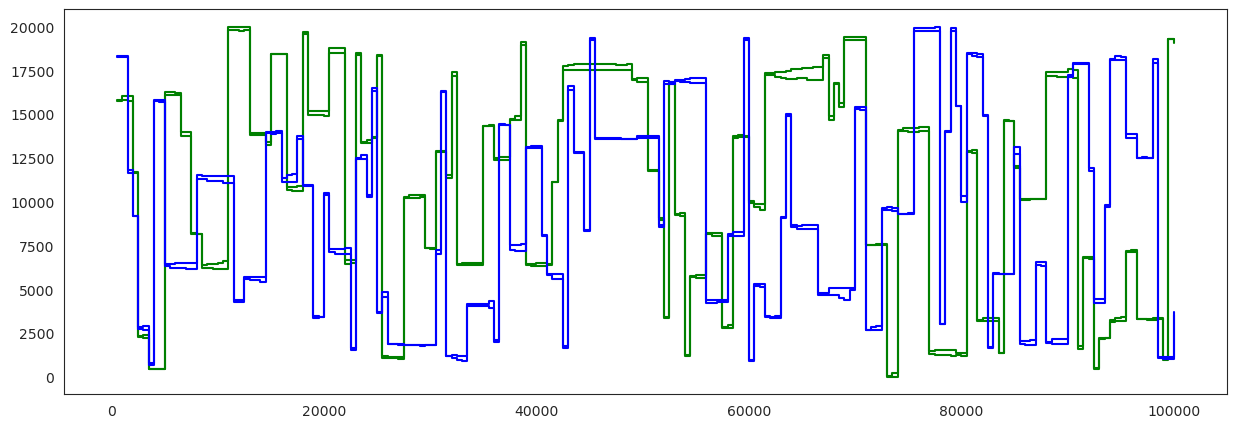

In [6]:
plt.figure(figsize=(15,5))
n=0
plt.step(
    ts,
    l_sites[:,n], c='g',where='post',)
plt.step(
    ts,
    r_sites[:,n], c='g',where='post',)


n=1
plt.step(
    ts,
    l_sites[:,n], c='b',
    where='post',)
plt.step(
    ts,
    r_sites[:,n], c='b',
    where='post',)

# Statistics of loop arrays.

In [ ]:
import collections

def get_n_leafs(idx, children):
    if isinstance(idx, collections.Iterable):
        return np.array([get_n_leafs(i, children) for i in idx])
    else:
        if len(children[idx])==0:
            return 1
        else:
            return sum([get_n_leafs(child, children) 
                        for child in children[idx]])


In [7]:
t=-1
parents = looptools.get_parent_loops(
            l_sites[t], 
            r_sites[t])
root_loops_idxs = np.where(parents == -1)[0]
children = looptools.get_loop_branches(parents)

/tmp/SLURM_16711662/ipykernel_52607/756258097.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  parents = looptools.get_parent_loops(


(array([20.,  6.,  4., 12., 11.,  8., 11.,  5.,  6.,  4.,  3.,  5.,  1.,
         1.,  3.,  0.,  1.,  1.,  1.,  1.]),
 array([  1. ,  33.8,  66.6,  99.4, 132.2, 165. , 197.8, 230.6, 263.4,
        296.2, 329. , 361.8, 394.6, 427.4, 460.2, 493. , 525.8, 558.6,
        591.4, 624.2, 657. ]),
 <BarContainer object of 20 artists>)

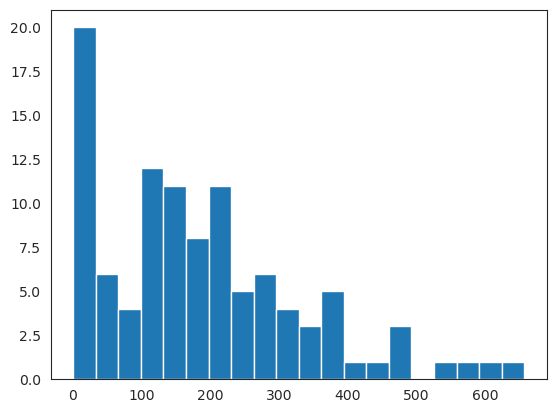

In [8]:
plt.hist(
    r_sites[t][root_loops_idxs] - l_sites[t][root_loops_idxs],
    bins=20)

# Visualize loops

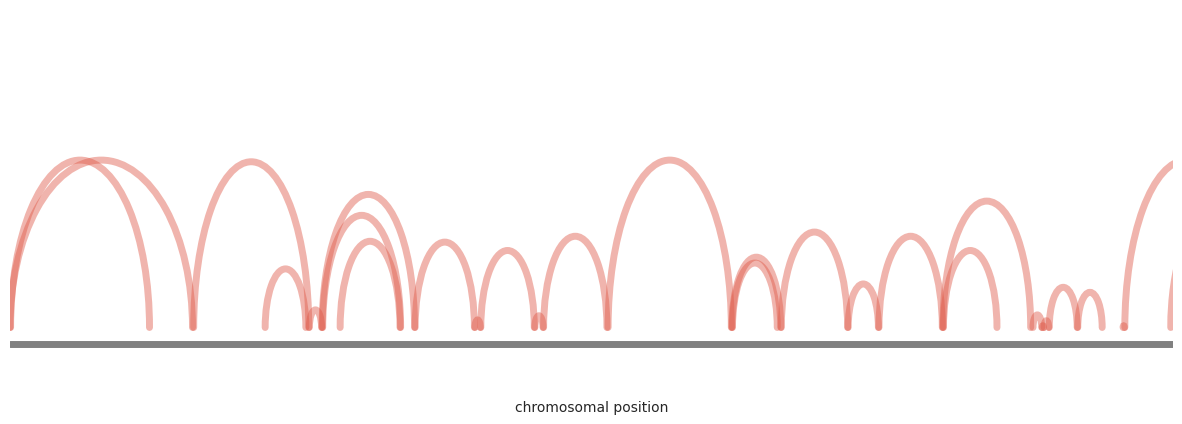

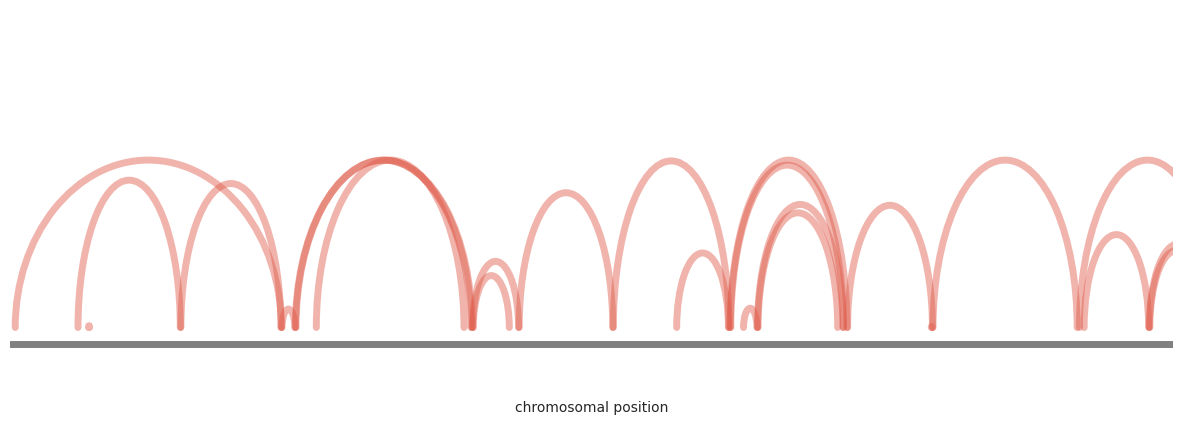

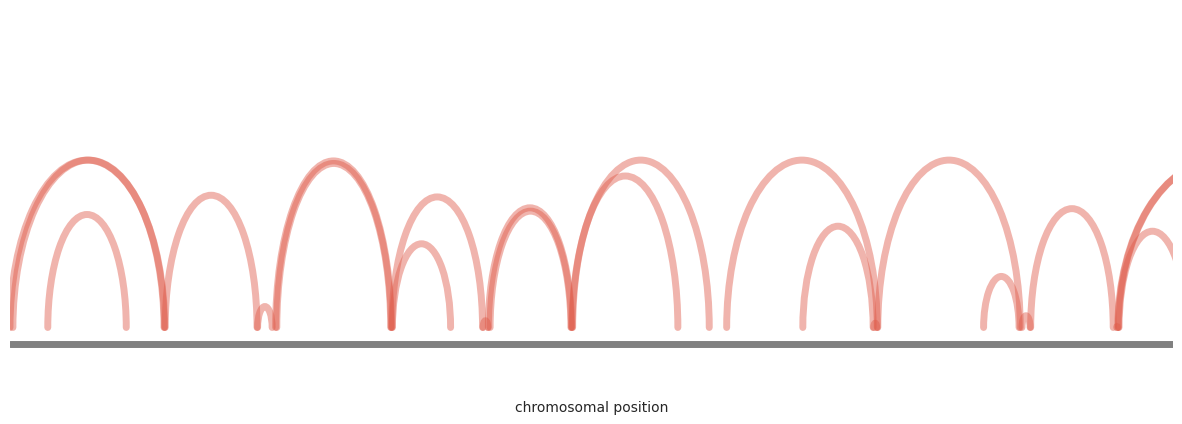

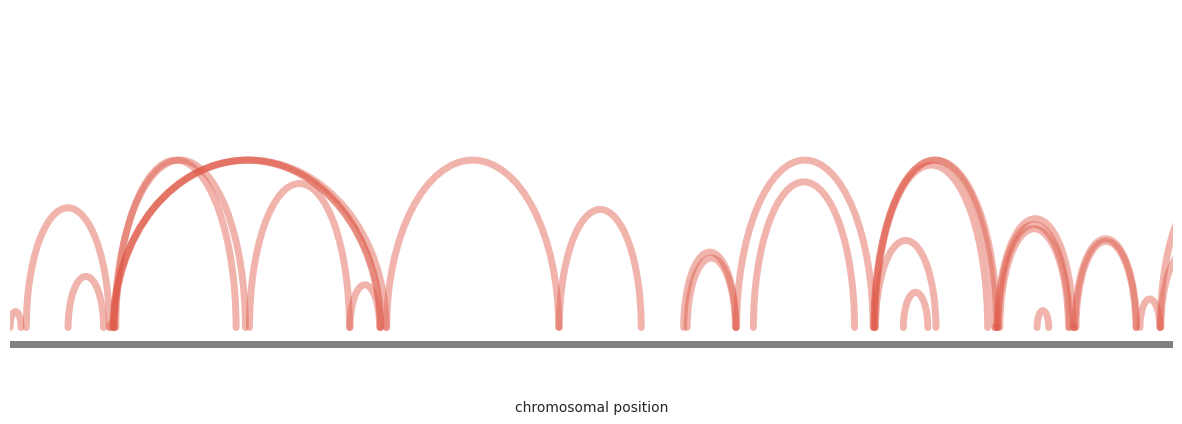

In [9]:
ts4plot = [0, 5, -20, -1]
for t in ts4plot:    
    loopviz.prepare_canvas(p['L'])
    loopviz.plot_lefs(
        l_sites=l_sites[t], 
        r_sites=r_sites[t], 
        colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
        max_height=200,
        plot_text=False,
        height_factor=2.0)
    plt.xlim(0,p['L']//10)
    plt.xticks([])
    plt.xlabel('chromosomal position')

Text(0.5, 0, 'chromosomal position')

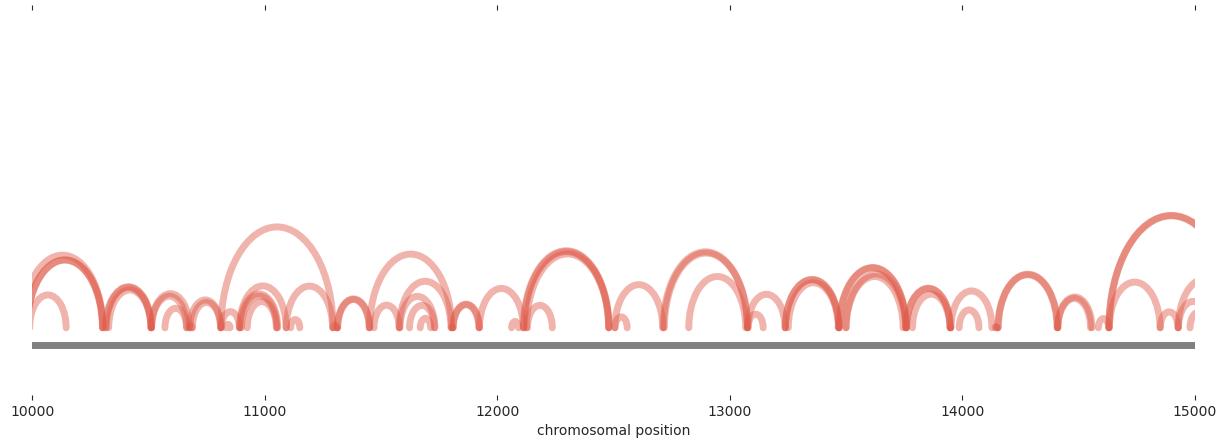

In [10]:
loopviz.prepare_canvas(p['L'])

loopviz.plot_lefs(
    l_sites=l_sites[-1,:], 
    r_sites=r_sites[-1,:], 
    colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
    max_height=200,
    plot_text=False,
    height_factor=0.5)
plt.xlim(10000,15000)
plt.xlabel('chromosomal position')